# **CV Mid term Assignment**
**Inchara Polepalli Muneshkumar**

**Student ID - 20307270**

**Question A**

In [ ]:
from PIL import Image
import cv2 as cv
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
plt.rcParams["figure.figsize"]=[12,9]

In [ ]:
im = Image.open("/content/drive/My Drive/CV/img.jpg")

In [ ]:
def crop():
  k=0
  imgwidth, imgheight = im.size
  for i in range(0,imgheight,16):
    for j in range(0,imgwidth,16):
      box = (j, i, j+16, i+16)
      a = im.crop(box).save(os.path.join("/content/drive/My Drive/CV/patches","IMG-%s.jpg" % k))
      k +=1
crop()

In [ ]:
images = []
for filename in os.listdir("/content/drive/My Drive/CV/patches"):
  img = cv.imread(os.path.join("/content/drive/My Drive/CV/patches",filename))
  if img is not None:
    images.append(img)
images = np.array(images)

In [ ]:
train_img = images.reshape((196,16*16*3))

In [ ]:
def constructImage (image, result):
  pos = 0
  for i in range(0,224,16):
      for j in range(0,224,16):
          image[i:i+16, j:j+16] = result[pos]
          pos += 1
  return image

Text(0, 0.5, 'Eigen Values')

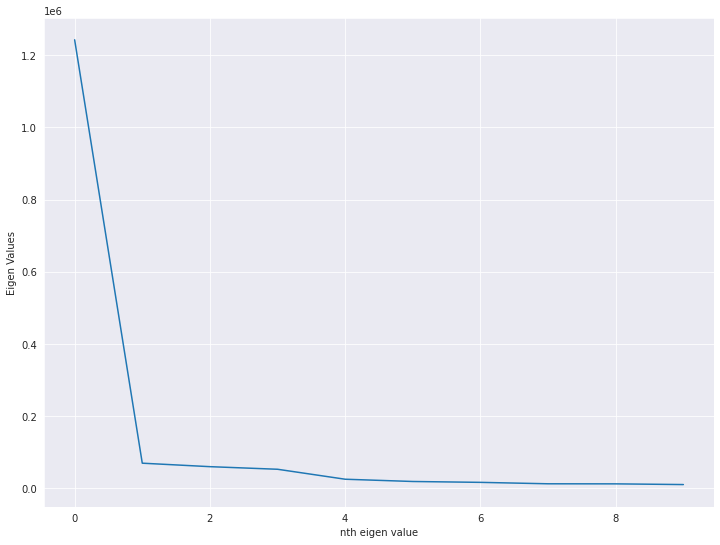

In [ ]:
pca_with_k10 = PCA(n_components=10).fit(train_img)
pca_with_k10_result = pca_with_k10.fit_transform(train_img)
plt.plot(pca_with_k10.explained_variance_)
plt.xlabel('nth eigen value')
plt.ylabel('Eigen Values')

In [ ]:
pca_with_k10_result_inverse = pca_with_k10.inverse_transform(pca_with_k10_result)
pca_with_k10_result_inverse = np.reshape(pca_with_k10_result_inverse,(196,16,16,3))

In [ ]:
image_k10 = np.zeros_like(im)
image_k10 = constructImage(image_k10,pca_with_k10_result_inverse)
cv.imwrite("/content/drive/My Drive/CV/results/image_k10.jpg",image_k10)

True

Text(0, 0.5, 'Eigen Values')

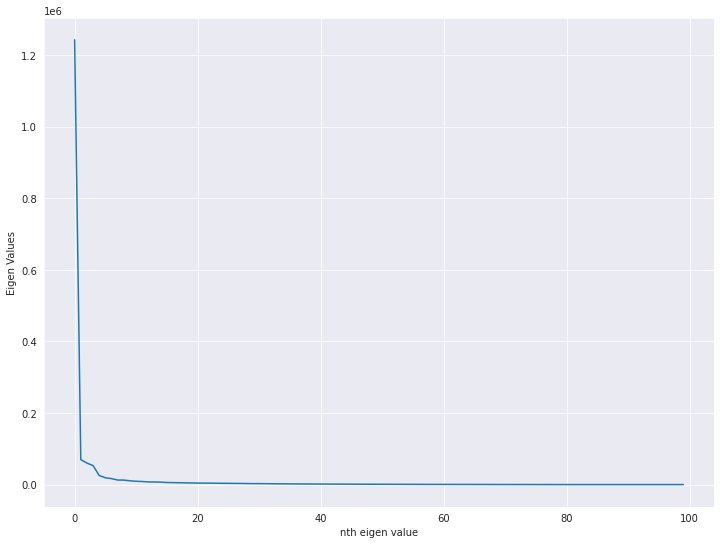

In [ ]:
pca_with_k100 = PCA(n_components=100).fit(train_img)
pca_with_k100_result = pca_with_k100.fit_transform(train_img)
plt.plot(pca_with_k100.explained_variance_)
plt.xlabel('nth eigen value')
plt.ylabel('Eigen Values')

In [ ]:
pca_with_k100_result_inverse = pca_with_k100.inverse_transform(pca_with_k100_result)
pca_with_k100_result_inverse = np.reshape(pca_with_k100_result_inverse,(196,16,16,3))

In [ ]:
image_k100 = np.zeros_like(im)
image_k100 = constructImage(image_k100,pca_with_k100_result_inverse)
cv.imwrite("/content/drive/My Drive/CV/results/image_k100.jpg",image_k100)

True

In [ ]:
pca_with_k50 = PCA(n_components=50).fit(train_img)
pca_with_k50_result = pca_with_k50.fit_transform(train_img)
pca_with_k50_result_inverse = pca_with_k50.inverse_transform(pca_with_k50_result)
pca_with_k50_result_inverse = np.reshape(pca_with_k50_result_inverse,(196,16,16,3))
image_k50 = np.zeros_like(im)
image_k50 = constructImage(image_k50,pca_with_k50_result_inverse)
cv.imwrite("/content/drive/My Drive/CV/results/image_k50.jpg",image_k50)

True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

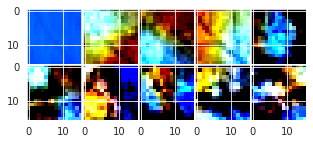

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(5,5))
matrix = ImageGrid(fig,111,nrows_ncols=(2,5))
vectors =[]
for vector in pca_with_k10.components_:
  scaled_img = vector*25
  scaled_img = scaled_img.reshape(16,16,3)
  vectors.append(scaled_img)
for ax, img in zip(matrix,vectors):
  ax.imshow(img)
plt.show()